\begin{align} **Homework** \space 2**  \space \space Zineb \space Senane\end{align}
### Problem 1

\begin{align}
        \mathbf{f(x_1,x_2,....,x_m)} = \sum_{i=1}^m a_i \cdot (x_i-b_i)^2+3
\end{align}



\begin{align}
Goal : min \space f(x) 
\end{align}

**Analysis:**

The gradient of f : $\bigtriangledown f(x)_{i}=2a_{i}(x_{i}-b_{i})$ for each component i.

The vector minmizing f  verifies $\bigtriangledown f(x^*)=0, \space by \space taking  \space x_{i}^*=bi , \forall i $ we have a null gradient. 
Hence, the minimum reached with this vector $x^*$ is 3.

The Hessian of the function f is $\bigtriangledown^2 f(x)_{i,j}=2a_{i}1_{i=j}$ which is a diagonal matrix.

The eigen values are then the elements of this diagonal and $\lambda_{max}=2max(a_{i}) , \lambda_{min}=2min(a_{i}).$






## Functions for our f, gradients and updates

In [97]:
import numpy as np

#Function to define our function by passing the parameters
def my_function(X,A,B):
  return np.sum(A*np.power(X-B,2))+3
#Function that compute the gradient of the function f
def grad_f(X,A,B):
  return 2*A*(X-B)
#descent function that return the updated X 
def update(X,A,B,step):
  return X-step*grad_f(X,A,B)
#norm functions
def norm(X,Y):
  return np.linalg.norm(X-Y)**2
#fonction used in the stop condition
def norm_grad(X,A,B):
  return np.sqrt(np.sum((2*A*(X-B))**2))




## Gradient descent without backtracking:

In [98]:
#Function to apply gradient descent algorithm
def grad_descent(X,A,B, epsilon,step):
  updates=[norm(grad_f(X,A,B),np.zeros(X.size))]
  iteration=0
  while norm_grad(X,A,B)>=epsilon:
    X=update(X,A,B,step)
    updates.append(norm_grad(X,A,B))
    iteration+=1
  print("converged after : ",iteration," iterations.")
  return X,updates

## Gradient descent with Backtracking:

In [99]:
def grad_descent_backtracking(X,A,B, epsilon,step,alpha=0.5,beta=0.5):
  updates=[norm_grad(X,A,B)]
  new_X=update(X,A,B,step)
  iteration=0
  while norm_grad(X,A,B)>=epsilon:
    while my_function(new_X,A,B)>my_function(X,A,B)-alpha*step*norm_grad(X,A,B)**2:
      step*=beta
      new_X=update(X,A,B,step)
    X=new_X
    new_X=update(new_X,A,B,step)
    updates.append(norm_grad(X,A,B))
    iteration+=1
  print("converged after : ",iteration," iterations.")
  return X,updates 

### 3. \begin{align} m=500, a_i = 1 \space ∀i, b_i \space is \space uniformly \space random \space in \space {0,..., 100}.
\end{align}

In [100]:
m=500
A=np.ones(m)
B=np.random.randint(0,100+1, size=m)
X=np.zeros(m)

### b) Choice of Step size and stopping condition:
\begin{align}
\frac{\partial^{2} f}{\partial x_{i} \partial x_{j} }=2 a_i 1_{{i=j}}\\
 \bigtriangledown^2 f= \begin{bmatrix}
    2 a_1 & & & & & \\
    & 2 a_2 & & & &\\
    & & . & & &\\
    & & & . & &\\
    & & & & . &\\
    & & & & & 2 a_m 
  \end{bmatrix}
\end{align}
\begin{align} 
\end{align}
if $a_{i} > 0 $ then $\bigtriangledown f $ is L lipschitz where $L=\lambda_{max}$ and m-strongly convex where $m=\lambda_{min}$ .

The maximum value of A elements is 1 which is also the minimum value. Then $\lambda_{max}=\lambda_{min}=2$.

Step size <$\frac{\lambda_{min}} {\lambda_{max}} =1$ , then the step size needed for gradient descent to converge should be less than 1. 

For the stop condition, we need to verify if the new X vector converge to the optimal solution $X^*$  . However we don't know what is the right $X^*$, but we know that the convergence of X to $X^*$ is equivalent to the convergence of the norm of gradient of f at point X to 0 because f is Lipschitz and the gradient of f at $X^*$ is 0.

We will test with two steps 0.4 and 0.5 for gradient descent. 
As the step size isn't critical for the backtracking case we choose t=1, and t=7 for example.


converged after :  14  iterations.
3.0000000000000475
converged after :  1  iterations.
3.0
converged after :  32  iterations.
converged after :  11  iterations.


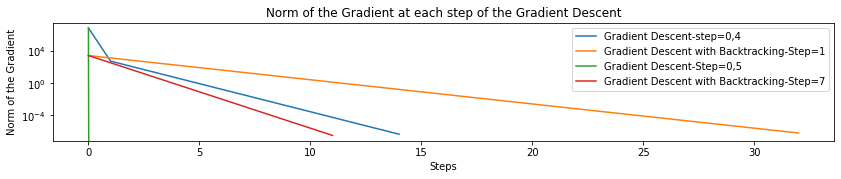

In [103]:
import matplotlib.pyplot as plt

#Run gradient Descent
gd_04=grad_descent(X,A,B,1e-6,0.4)
print(my_function(gd_04[0],A,B))
evaluation_grad_desc_04=gd_04[1]
k1=np.linspace(0,len(evaluation_grad_desc_04)-1,num=len(evaluation_grad_desc_04))


gd_05=grad_descent(X,A,B,1e-6,0.5)
print(my_function(gd_05[0],A,B))
evaluation_grad_desc_05=gd_05[1]
k2=np.linspace(0,len(evaluation_grad_desc_05)-1,num=len(evaluation_grad_desc_05))


#Run gradient descent with backtracking
gb_1=grad_descent_backtracking(X,A,B,1e-6,1)
evaluation_grad_desc_back_1=gb_1[1]
k3=np.linspace(0,len(evaluation_grad_desc_back_1)-1,num=len(evaluation_grad_desc_back_1))


gb_7=grad_descent_backtracking(X,A,B,1e-6,7)
evaluation_grad_desc_back_7=gb_7[1]
k4=np.linspace(0,len(evaluation_grad_desc_back_7)-1,num=len(evaluation_grad_desc_back_7))

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(4, 1, 1)
ax.set_yscale('log')
plt.plot(k1,evaluation_grad_desc_04,label='Gradient Descent-step=0,4')
plt.plot(k3,evaluation_grad_desc_back_1,label='Gradient Descent with Backtracking-Step=1')
plt.plot(k2,evaluation_grad_desc_05,label='Gradient Descent-Step=0,5')
plt.plot(k4,evaluation_grad_desc_back_7,label='Gradient Descent with Backtracking-Step=7')
plt.title("Norm of the Gradient at each step of the Gradient Descent")
plt.xlabel("Steps")
plt.ylabel("Norm of the Gradient")
plt.legend()


As we can see for the standard gradient descent with a step size of 0.5 the algorithm converges  in one iteration and gives better convergence as the minimum reached is exactly 3 (the value expected in the analytical analysis). For step=0.4 the algorithm converges in 13 iterations but not in an exponential way.
For the backtracking case, we observe that algorithm converges always exponentially (we a line in log scale) with differents initial step as the choice of step size is not critical here. However the number of iterations changes. With step size =7 the algorithm converges only in 11 iterations compared to a step size of 1 (need 32 iterations to converge).

## 4. \begin{align} m=500, a_i  \space and \space  b_i \space is \space uniformly \space random \space in \space {1,..., 100}, ∀i.
\end{align}

In [106]:
m=500
A=np.random.randint(1,100+1, size=m)
B=np.random.randint(1,100+1, size=m)
X=np.zeros(m)

### b) Choice of Step size and stopping condition:
\begin{align}
\frac{\partial^{2} f}{\partial x_{i} \partial x_{j} }=2 a_i 1_{{i=j}}\\
 \bigtriangledown^2 f= \begin{bmatrix}
    2 a_1 & & & & & \\
    & 2 a_2 & & & &\\
    & & . & & &\\
    & & & . & &\\
    & & & & . &\\
    & & & & & 2 a_m 
  \end{bmatrix}
\end{align}
\begin{align} if \space a_{i}
\end{align}
if $a_{i} > 0 $ then $\bigtriangledown f $ is L lipschitz where $L=\lambda_{max}$ and m-strongly convex where $m=\lambda_{min}$ .

The maximum value that can be reached for A elements is 100 and the minimum value is greater or equal than 1. Then $\lambda_{max} \le 200, \lambda_{min} \ge 2$.

Hence, Step<$\frac {\lambda_{min}} {\lambda_{max}} =\frac{2} {200}=0.01$ , the step size for gradient descent should be less than 0.01. 

For the stop condition, we need the verify if the new X vector converge to the optimal solution $X^*$  . However we don't know what is the right $X^*$, but we know that the convergence of X to $X^*$ is equivalent to the convergence of the norm of gradient of f at point X to 0 as f is Lipschitz and  the gradient of f at $X^*$ is 0.

We will test with the gradient descent at this case with two steps 0.0045 and 0.0099 . As the previous case the step size isn't critical for backtracking as we update it if it's not adapted, then we will keep the same values t=1 and t=7. 

converged after :  2136  iterations.
3.000000000000249
converged after :  1182  iterations.
3.0000000000000027
converged after :  2462  iterations.
converged after :  2815  iterations.


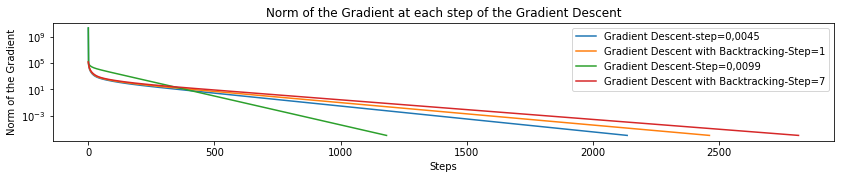

In [107]:
import matplotlib.pyplot as plt

#Run gradient Descent
gd_045=grad_descent(X,A,B,1e-6,0.0045)
print(my_function(gd_045[0],A,B))
evaluation_grad_desc_045=gd_045[1]
k1=np.linspace(0,len(evaluation_grad_desc_045)-1,num=len(evaluation_grad_desc_045))


gd_099=grad_descent(X,A,B,1e-6,0.0099)
print(my_function(gd_099[0],A,B))
evaluation_grad_desc_099=gd_099[1]
k2=np.linspace(0,len(evaluation_grad_desc_099)-1,num=len(evaluation_grad_desc_099))


#Run gradient descent with backtracking
gb_1=grad_descent_backtracking(X,A,B,1e-6,1)
evaluation_grad_desc_back_1=gb_1[1]
k3=np.linspace(0,len(evaluation_grad_desc_back_1)-1,num=len(evaluation_grad_desc_back_1))


gb_7=grad_descent_backtracking(X,A,B,1e-6,7)
evaluation_grad_desc_back_7=gb_7[1]
k4=np.linspace(0,len(evaluation_grad_desc_back_7)-1,num=len(evaluation_grad_desc_back_7))

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(4, 1, 1)
ax.set_yscale('log')
plt.plot(k1,evaluation_grad_desc_045,label='Gradient Descent-step=0,0045')
plt.plot(k3,evaluation_grad_desc_back_1,label='Gradient Descent with Backtracking-Step=1')
plt.plot(k2,evaluation_grad_desc_099,label='Gradient Descent-Step=0,0099')
plt.plot(k4,evaluation_grad_desc_back_7,label='Gradient Descent with Backtracking-Step=7')
plt.title("Norm of the Gradient at each step of the Gradient Descent")
plt.xlabel("Steps")
plt.ylabel("Norm of the Gradient")
plt.legend()


For this case, the standard gradient descent with step size=0.0099 converges rapidely and much better than the other cases including gradient descent with backtracking. The convergence rates for this case are asymptotically exponential. Comparing these results with the ones obtained in the previous case, we notice that  here we have a very large number iterations.

# Problem 2: Dual Ascent

\begin{align}
        \mathbf{f(x_1,x_2,....,x_m)} = \sum_{i=1}^m a_i \cdot (x_i-b_i)^2+3
    \end{align}

Goal : minimize f such that:

$ x_i \ge 0 , \forall i$

$ \sum_{i=1}^m x_i \le 100$

We first calculate the Langrangian:

$ h_i(x)=- x_i, \forall i ⊂{1,...,m}$

$ h_{m+1}(x)=\sum_{i=1}^m x_i - 100$

$L(x,u)=f(x)+ \sum_{i=1}^{m+1} u_ih_i(x)$

Question 1:

The KKT condition for this minimization problem are:

1.      Stationarity: $0 \subset \partial_x (f(x)+\sum_{i=1}^{m+1} u_ih_i(x))$

$ \partial_{x_i} (f(x)+\sum_{i=1}^{m+1} u_ih_i(x))= 2a_i(x_i-b_i)-u_i+u_{m+1}$

Then :

 $2a_i(x_i-b_i)-u_i+u_{m+1}=0, \forall i \subset {1,.....,m}$

 2. Complementarity slackness:

 $ u_i h_i(x) =0, \forall i$

 Then:

 $ u_i \cdot x_i=O ,  \forall i \subset  {1,.....,m}$

 $ u_{m+1} \cdot (\sum_{i=1}^{m+1} x_i -100)=0$


 3. Primal feasibility: $h_i(x) \le 0, \forall i$

 $ x_i \ge 0, \forall i \subset {1,....,m}$

 $ \sum_{i=1}^{m+1} x_i \le 100$

 4. Dual feasibility:

 $u_i \ge 0, \forall i$

Expression for primal and dual variables: 

From condition 2. we have : $x_i \neq 0 \Leftrightarrow u_i=0 $

From condition 1, we get $ x_i=  b_i + \frac {u_i - u_{m+1}}{2 a_i } \ge 0$

From condition 4, we conclude that $u_{m+1}=0$  or $\sum_{i=1}^{m+1} x_i=100$

To implement the dual ascent algorithm we need first to find the argmin of the Langrangian. We can do it analytically(as from condition 1) or by applying gradient descent with or without backtracking to the Langrangian. 
So I will use both of them  to find the argmin of Langrangian.

In [119]:
def grad_descent_lang_backtracking(X,A,B,U, epsilon,step,alpha=0.5,beta=0.5):
  new_X=update_L_X(X,A,B,U,step)
  iteration=0
  while norm_grad_L(X,A,B,U)>=epsilon:
    while langraNgian(new_X,A,B,U)>langraNgian(X,A,B,U)-alpha*step*(norm(grad_L_x(X,A,B,U),np.zeros(grad_L_x(X,A,B,U).size))):
      step*=beta
      new_X=update_L_X(X,A,B,U,step)
    X=new_X
    new_X=update_L_X(new_X,A,B,U,step)
    iteration+=1
  return X
  

In [120]:
def langraNgian(X,A,B,U):
  return my_function(X,A,B)-np.dot(X, U[:-1])+U[-1]*(np.sum(X)-100)
def grad_L_x(X,A,B,U):
  return grad_f(X,A,B)-U[:-1]+U[-1]
def norm_grad_L(X,A,B,U):
  return np.sum((grad_f(X,A,B)-U[:-1]+U[-1])**2)
def update_L_X(X,A,B,U,step):
  return X-step*grad_L_x(X,A,B,U)  
def grad_L_u(X,U):
  return np.append(-X,np.sum(X)-100)
def argmin(X,A,B,U):
  return B+(U[:-1]-U[-1])/(2*A)
def update_U(X,A,B,U,step):
  new_U=np.maximum(U+step*grad_L_u(X,U),0)
  if(np.sum(X)==100):
    u=new_U[-1]
  else:
    u=0
  return np.append(new_U[:-1],u)
def dual_ascent(X,A,B,U,epsilon,step):
  updates=[my_function(X,A,B)-langraNgian(X,A,B,U)]
  new_X=X
  new_U=U
  iteration=0
  while my_function(new_X,A,B)-langraNgian(new_X,A,B,new_U)>=epsilon:
    
    new_X=grad_descent_lang_backtracking(new_X,A,B,new_U, epsilon,3,alpha=0.5,beta=0.5)#argmin
    new_U=update_U(new_X,A,B,new_U,step)
    iteration+=1
    updates.append(norm_grad(new_X,A,B))
  print("converged after : ",iteration," iterations.")
  return updates




In [133]:
m=500
A=np.random.randint(1,100+1, size=m)
B=np.random.randint(1,100+1, size=m)
X=np.zeros(m)
U=np.ones(m+1)

converged after :  100  iterations.
converged after :  67  iterations.
converged after :  50  iterations.
converged after :  10  iterations.
converged after :  3  iterations.
converged after :  2  iterations.


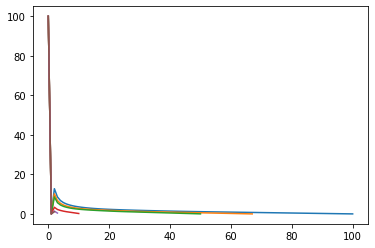

In [146]:
t=[0.01,0.015,0.02,0.1,0.4,0.5]
for elt in t:
  dual=dual_ascent(X,A,B,U,1e-6,elt)
  evaluation_dual=dual
  k2=np.linspace(0,len(evaluation_dual)-1,num=len(evaluation_dual))
  plt.plot(k2,evaluation_dual)

In [142]:
def gradient_ascent(X,A,B,U,epsilon,step):
  #updates=[my_function(X,A,B)-langraNgian(X,A,B,U)]
  new_X=X
  new_U=U
  iteration=0
  updates=[]
  while my_function(new_X,A,B)-langraNgian(new_X,A,B,new_U)>=epsilon:
    
    new_X=argmin(new_X,A,B,new_U)
    new_U=update_U(new_X,A,B,new_U,step)
    iteration+=1
    updates.append(norm_grad(new_X,A,B))
  print("converged after : ",iteration," iterations.")
  return updates

converged after :  100  iterations.
converged after :  67  iterations.
converged after :  50  iterations.
converged after :  10  iterations.
converged after :  3  iterations.
converged after :  2  iterations.
converged after :  1  iterations.


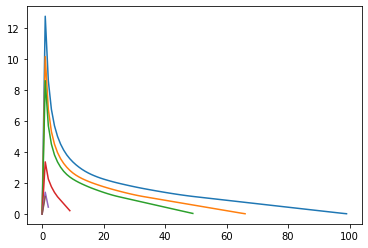

In [144]:
t=[0.01,0.015,0.02,0.1,0.4,0.5,1]
for elt in t:
  dual=gradient_ascent(X,A,B,U,1e-6,elt)
  evaluation_dual=dual
  k2=np.linspace(0,len(evaluation_dual)-1,num=len(evaluation_dual))
  plt.plot(k2,evaluation_dual)

We conclude that there is no difference between using the analytical expression for the argmin and using gradient descent with backtracking to minimize the Langrangian.
As the step size increase, the algorithm converge in less number of iterations.
<br>
**The stop condition :** Our goal ,minimizing f with the constraints will be reached if we can solve an unconstrained minimization problem and reduce as much as possible the penalty, which is equivalent to minimize the distance (difference) between the Langrangian and the function.

The convergence rate seems to be exponential (asymptotically).






3.As we can see, the function to minimize can be decomposed into m subfunctions such that: $f_{i}(x_{i})=a_{i}(x_{i}-b_{i})^2+\frac {3}{m}$. By using the dual decomposition , the argmin can be calculated using different cores each one is responsible for the $argmin_{i}$. The central node will then receive all the $argmin_{i}$ and use the to update the U. That means that the number of iterations for the dual ascent convergence will not be reduced. However, distributing the argmin problem will help to reduce the time of execution of the dual ascent algorithm.  
